In [107]:
#!pip install sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from genderUtils import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [108]:
path =  '../../bog_nu//goldstandard.csv'
df = pd.read_csv(path, sep="\t")
my_palette2 = ['teal', 'lightcoral']
my_palette4 = ['teal','lightseagreen','whitesmoke','mistyrose'] #whitesmoke, darkgray, gainsboro
sns.set_theme(style="darkgrid")


# Boganmeldelser i danske Aviser

I denne notebook analyserer vi dataset med 57.000 boganmeldelser af skønlitteratur skrevet i danske medier i årerne 2010-2021. 

For boganmeldelser skrevet i aviser og regionalaviser har vi 24.753 datapunkter. 

In [109]:
# create a dataframe for reviews written in the categories 'Avis' and 'Regional avis'
df_np = df[(df['media_type_name']== 'Avis')|(df['media_type_name'] == 'Regional avis')]
df_np.shape

(24753, 30)

## Karakterer
Nedenfor viser vores resultater at mandlige anmeldere giver højest karakterer til mandlige forfattere, og at kvindelige anmeldere giver lavere karakterer til kvindelige forfattere. 

Karakterer og kønskombination: 

- Kvindelig anmelder og kvindelig forfatter: **3.9820**
- Kvindelig anmelder og mandlig forfatter: 3.9820  + 0.0881 = **4.0701**
- Mandlig anmelder og kvindelig forfatter: 3.9820  + 0.1140 = **4.096**
- Mandlig anmelder og mandlig forfatter: 3.9820  + 0.2084 = **4.1904**

Alle resultaterne er statisktisk signifikante med et konfidensinterval på 95 %. 

In [110]:
model_h1 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_np)
res_h1 = model_h1.fit()

res_h1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     47.23
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):           2.04e-30
Time:                          17:54:36   Log-Likelihood:                -31493.
No. Observations:                 22125   AIC:                         6.299e+04
Df Residuals:                     22121   BIC:                         6.303e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.9820      0.015    267.502      0.000       3.953       4.011
C(gender_combi)[T.female_male]     0.0881      0.022      3.924      0.000       0.044       0.132
C(gender_combi)[T.male_female]     0.1140      0.021      5.382      0.000       0.072       0.156
C(gender_combi)[T.male_male]       0.2084      0.018     11.523      0.000       0.173       0.244
==============================================================================
Omnibus:                      615.296   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.104
Skew:                          -0.420   Prob(JB):                    1.38e-145
Kurtosis:                       3.138   Cond. No.                         5.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Kvinde, Mand'),
 Text(1, 0, 'Mand, Mand'),
 Text(2, 0, 'Kvinde, Kvinde'),
 Text(3, 0, 'Mand, Kvinde')]

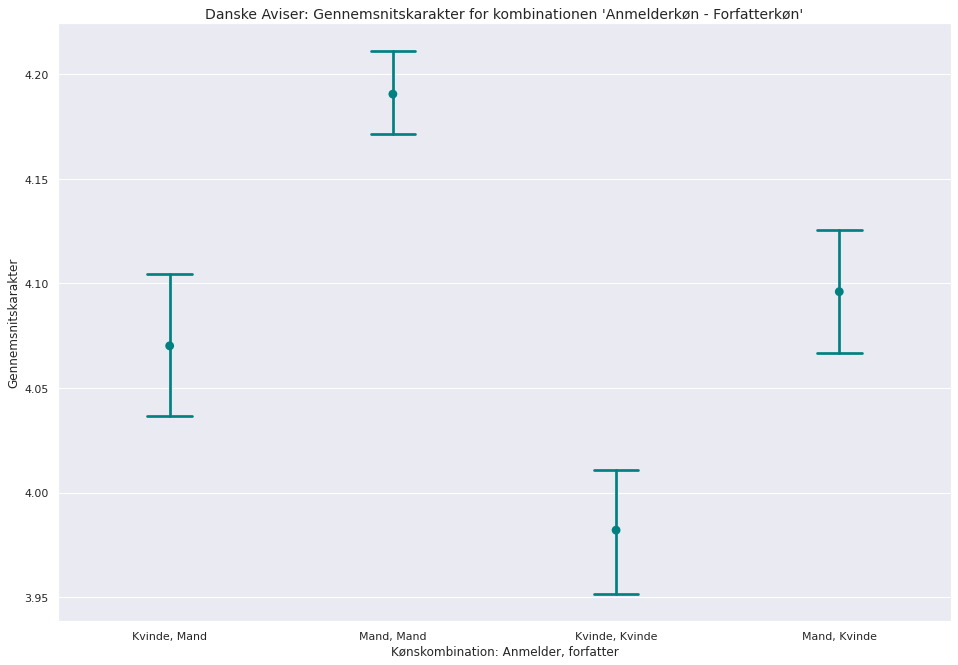

In [111]:
sns.set_theme(style="darkgrid")
sns.set_palette("Dark2", 8, .75)
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_np, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("Danske Aviser: Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Kvinde, Mand','Mand, Mand','Kvinde, Kvinde','Mand, Kvinde'])



## Kønsbalance

Mandlige anmeldere dominerer i aviserne og de anmelder i høj grad mandlige forfattere. 

- 63% boganmeldelser udgivet i aviser er skrevet af mænd. 
- 69% af disse er ophandlende mandlige forfattere.

<!--20117 ,12664-->

Kvindelige anmeldere dominerer i blogs, og de anmelder primært kvindelige forfattere.
- 87 % af boganmeldelser i bloggene er skrevet af kvinder. 
- Ud ad disse er 60% ophandlende kvindelige forfattere.

<!--13303-->

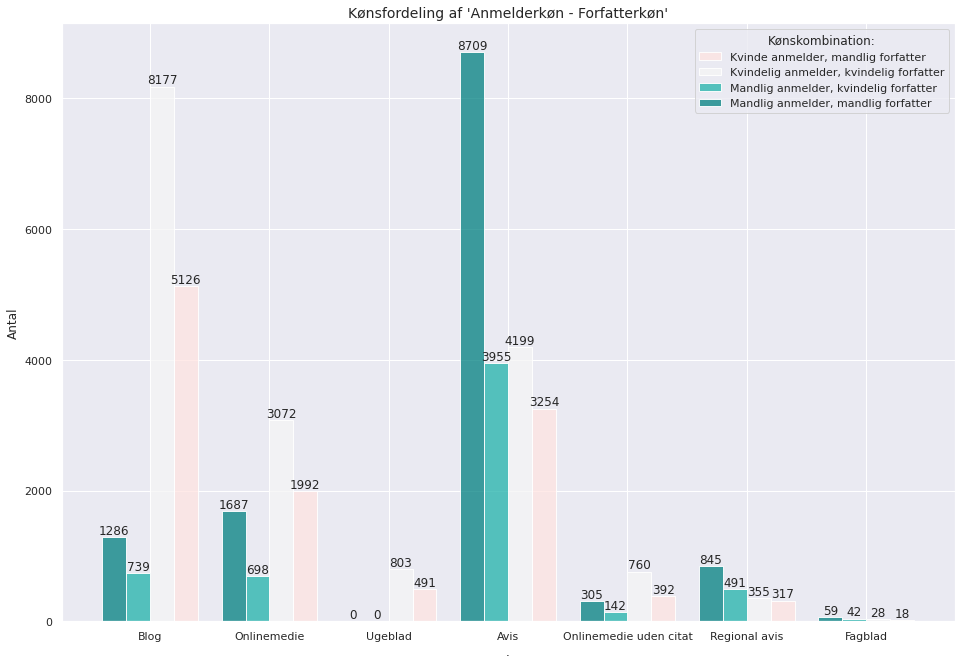

In [112]:
# gender distribution 

ax = sns.histplot(x="media_type_name", data = df, hue= 'gender_combi', hue_order = ['male_male','male_female','female_female','female_male'], multiple="dodge",shrink=.8, palette= my_palette4)
ax.figure.set_size_inches(16,11)
ax.set_title("Kønsfordeling af 'Anmelderkøn - Forfatterkøn'", fontsize =  14)
ax.set_ylabel('Antal')
ax.set_xlabel('.')

for container in ax.containers:
    ax.bar_label(container)

#ax.legend(loc="upper right")
ax.legend(['Kvinde anmelder, mandlig forfatter','Kvindelig anmelder, kvindelig forfatter','Mandlig anmelder, kvindelig forfatter','Mandlig anmelder, mandlig forfatter'])

ax.get_legend().set_title('Kønskombination:')


## Kønsbalance gennem årene

Nedenfor har vi plottet fordelingen af anmelder og forfatterkøn i danske aviser 2010-2021. 

Da antal anmeldelser ikke er ens for alle år, har vi valgt at normalisere vores data for derved bedre at kunne visualisere den procentvise fordeling. 

For alle anmelederse udgivet i årene 2010-2021 er ca. to ud tre skrevet af mænd. 
Ud af disse er ca. to ud af tre ophandlende mandlige forfattere. 

Denne tendens går igen for alle årene, dog med et lille fald ad mand-mand kombinationen i de senere år. 

Text(0.5, 1.0, 'Kønsbalance i Danske Aviser (normaliseret), 2010-2021')

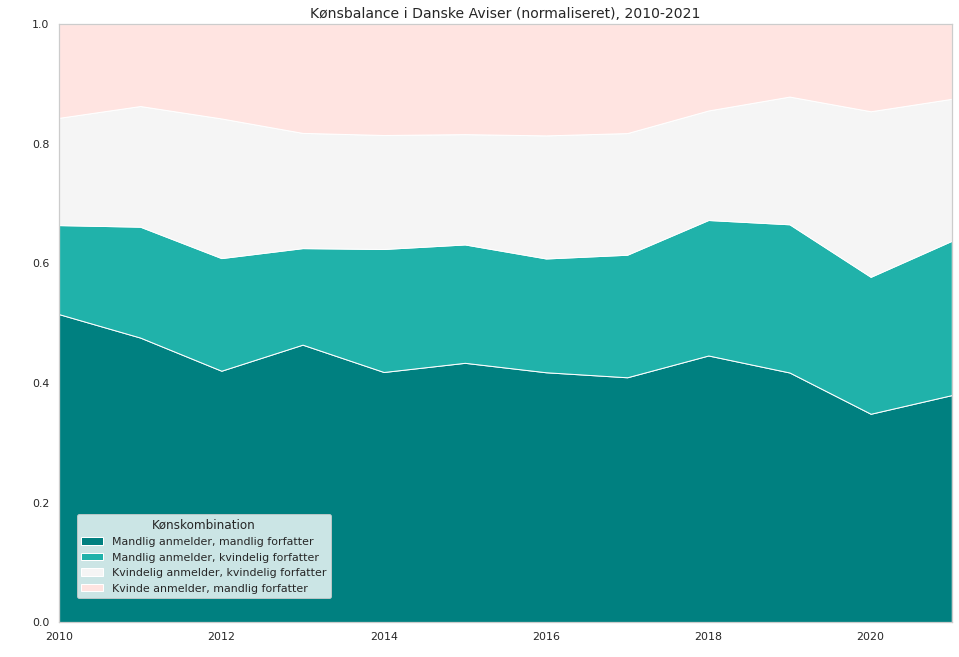

In [114]:
grouped = df_np.groupby(['year','gender_combi']).size().unstack()
normalized_np = grouped.div(grouped.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvinde anmelder, mandlig forfatter']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_np[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i Danske Aviser (normaliseret), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})


## Bøger anmeldt på tværs af køn

Nedenfor har vi kigget på bøger der er anmeldt mere end én gang. Hvordan fordeler anmelderkønnene sig her?

I det nedenstående plot kan vi se at...
- Knap 600 bøger er kun anmeldt af kvindelige forfattere. 
- Den midterste søjle indikerer at ca. 900 bøger er blevet anmeldt af lige mange mænd og kvinder. 
- Over 1400 bøger kun er anmeldt af mandlige forfattere. 




Got  7305 titles!


<AxesSubplot:title={'center':'Antal anmeldelser for bøger anmeldt > 1 gang'}, xlabel='Anmelderkøn: Mand 0 - Kvinde 1', ylabel='Antal'>

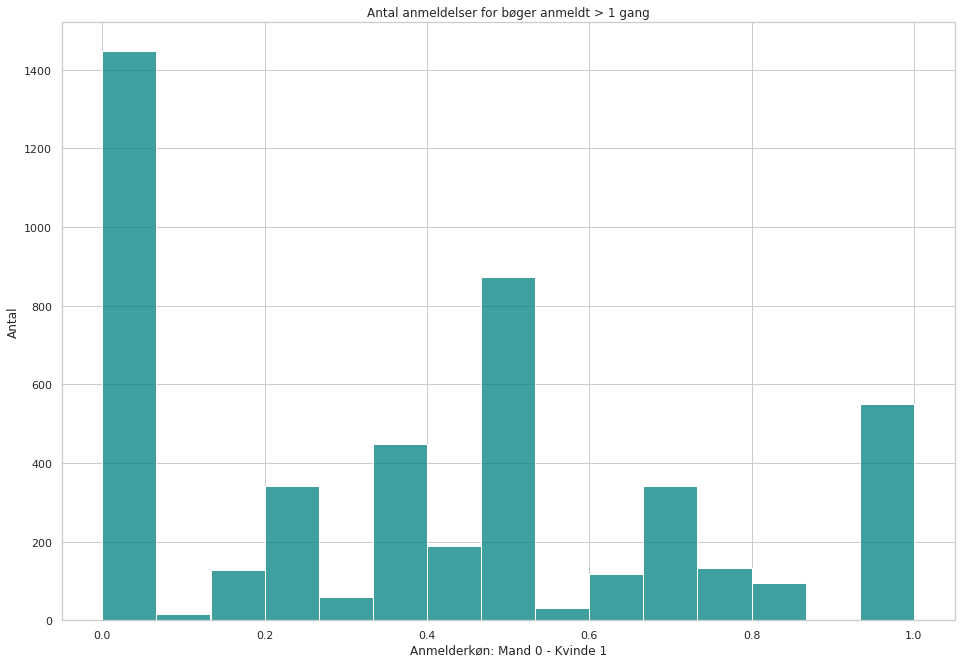

In [115]:
def plot_gender(dataframe):
    ax = sns.histplot(data=dataframe, x="gender", color=['teal'])
    ax.figure.set_size_inches(16,11)

    ax.set_title(f"Antal anmeldelser for bøger anmeldt > 1 gang")
    ax.set_ylabel('Antal')
    ax.set_xlabel('Anmelderkøn: Mand 0 - Kvinde 1')
    
    return ax

df_to_plot = construct_new_dataframe(df_np)
df_multiple_rev = df_to_plot[df_to_plot['review_count']> 1]
plot_gender(df_multiple_rev)

### Hvordan udvikler det sig over tid? 



Got  745 titles!
Got  814 titles!
Got  712 titles!
Got  650 titles!
Got  664 titles!
Got  762 titles!
Got  721 titles!
Got  687 titles!
Got  637 titles!
Got  581 titles!
Got  492 titles!
Got  421 titles!


Text(0.5, 0.98, 'Antal anmeldelser for bøger anmeldt > 1 gang')

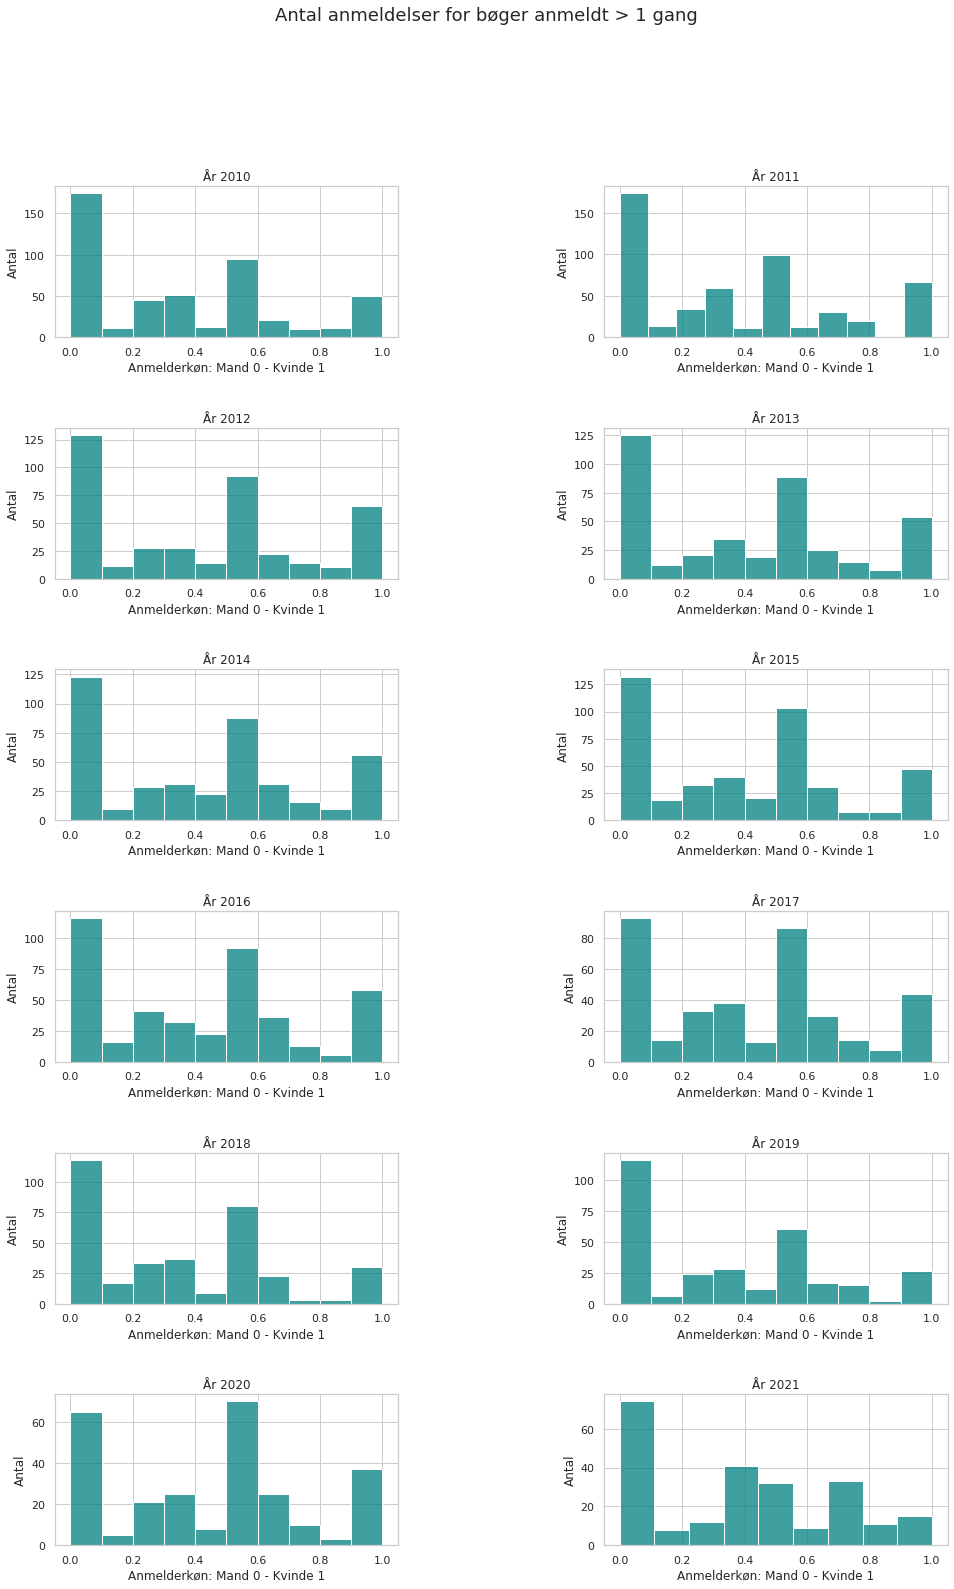

In [116]:
fig = plt.figure(figsize=(16,25))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
    
for i,j in enumerate(range(2010, 2022)):
    yearly_df = df_np[df_np['year'] == j]
    df_to_plot = construct_new_dataframe(yearly_df)
    df_multiple_rev = df_to_plot[df_to_plot['review_count']> 1]

    ax = fig.add_subplot(6, 2, i+1)
    sns.histplot(data=df_multiple_rev, x="gender", color=['teal'])
    ax.set_title(f"År {j}")
    ax.set_ylabel('Antal')
    ax.set_xlabel('Anmelderkøn: Mand 0 - Kvinde 1')
    
fig.suptitle('Antal anmeldelser for bøger anmeldt > 1 gang', fontsize = 18)
    

## Karakterer og kønsfordeling 

På nedenstående plot har vi karakterskalaen 1-6 på x-aksen og anmelder-køn på y-aksen. 0.0 er bøger kun anmeldt af mænd, 1.0 er bøger kun anmeldt af kvinder, 0.5 er bøger der er anmeldt ligemeget af mænd og kvinder. 

Her ses det igen at anmelderkøn korrelerer med forfatterkøn. Det vil sige, at mænd anmelder flere mandlige forfattere og kvindelige anmeldere anmelder flere kvindelige forfattere. 


Got  7305 titles!


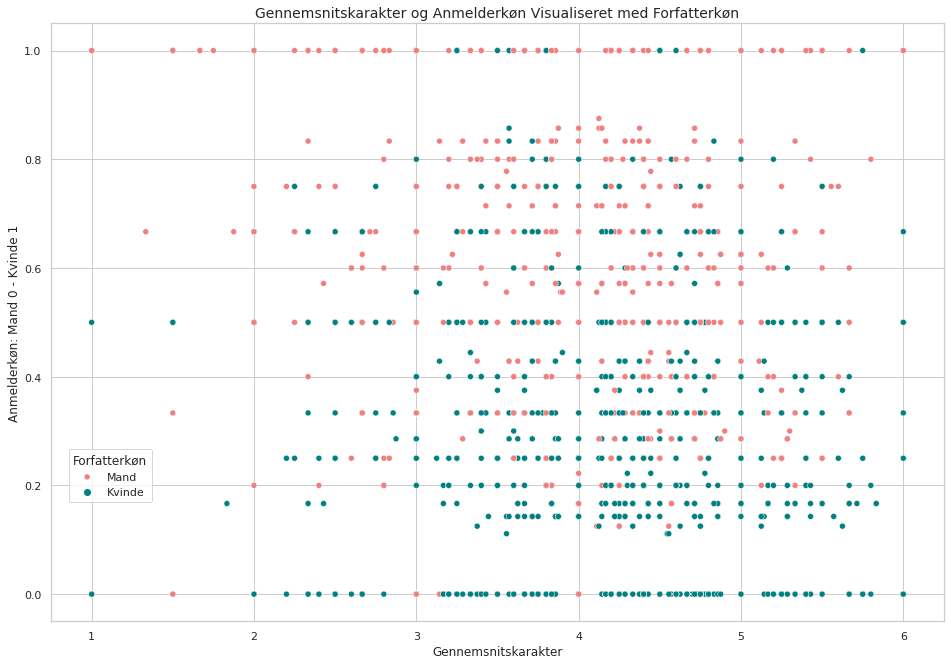

In [117]:
df_to_plot = construct_new_dataframe(df_np)

ax = sns.scatterplot(data=df_to_plot, x="average_grade", y="gender", hue=df_to_plot.author_gender, hue_order = ['male','female'],palette=my_palette2)
ax.figure.set_size_inches(16,11)
ax.set_title("Gennemsnitskarakter og Anmelderkøn Visualiseret med Forfatterkøn",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_xlabel('Gennemsnitskarakter')
ax.set_ylabel('Anmelderkøn: Mand 0 - Kvinde 1')

ax.legend(['Mand', 'Kvinde'], title="Forfatterkøn", loc=(0.02,0.2))


## Hvad med 'Information'?

Her gentager vi nogle af ovenstående analyser udelukkende på anmeldelser udgivet i Information. 

Karakterer og kønskombination: 

- Kvindelig anmelder og kvindelig forfatter: **4.0480**
- Kvindelig anmelder og mandlig forfatter: **ikke statisktisk signifikant**
- Mandlig anmelder og kvindelig forfatter: **ikke statisktisk signifikant**
- Mandlig anmelder og mandlig forfatter: 4.0480 + 0.1187 = **4.1667**


In [118]:
# select reviews written in 'Information'
df_inf = df[(df['media_name'] == 'Information')] # 2283 in total

model_h2 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_inf)
res_h2 = model_h2.fit()

res_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.661
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):              0.173
Time:                          17:54:51   Log-Likelihood:                -2799.2
No. Observations:                  1994   AIC:                             5606.
Df Residuals:                      1990   BIC:                             5629.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          4.0480      0.044     91.802      0.000       3.962       4.134
C(gender_combi)[T.female_male]     0.0337      0.068      0.492      0.623      -0.101       0.168
C(gender_combi)[T.male_female]     0.0804      0.070      1.154      0.249      -0.056       0.217
C(gender_combi)[T.male_male]       0.1187      0.056      2.113      0.035       0.009       0.229
==============================================================================
Omnibus:                       61.278   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.218
Skew:                          -0.437   Prob(JB):                     4.18e-15
Kurtosis:                       3.183   Cond. No.                         4.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Kvinde, Mand'),
 Text(1, 0, 'Mand, Mand'),
 Text(2, 0, 'Mand, Kvinde'),
 Text(3, 0, 'Kvinde, Kvinde')]

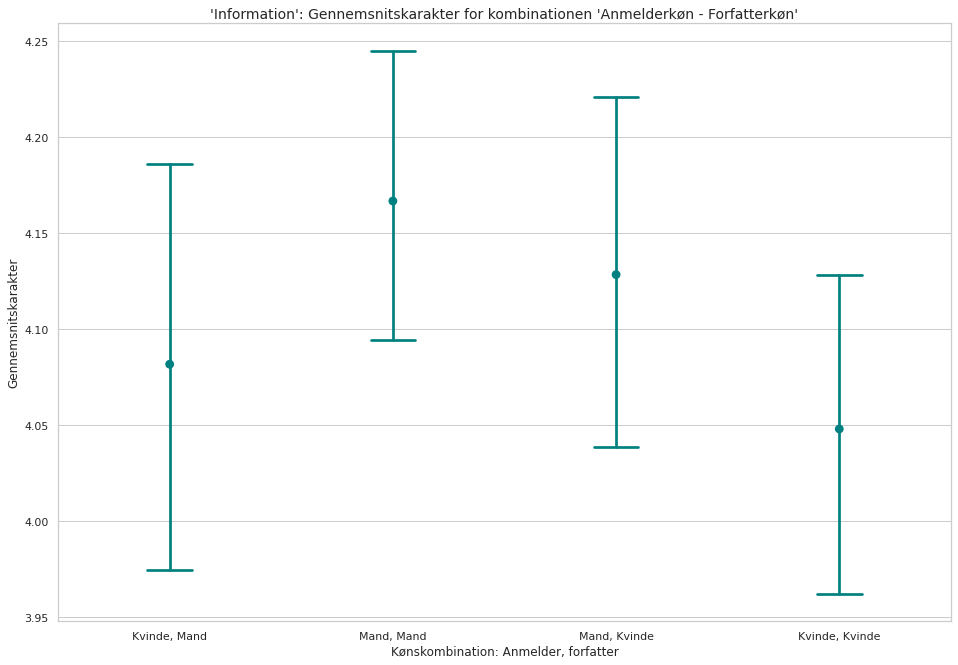

In [119]:
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_inf, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("'Information': Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Kvinde, Mand','Mand, Mand','Mand, Kvinde','Kvinde, Kvinde'])


Text(0.5, 1.0, "Kønsbalance i 'Information' (normaliseret), 2010-2021")

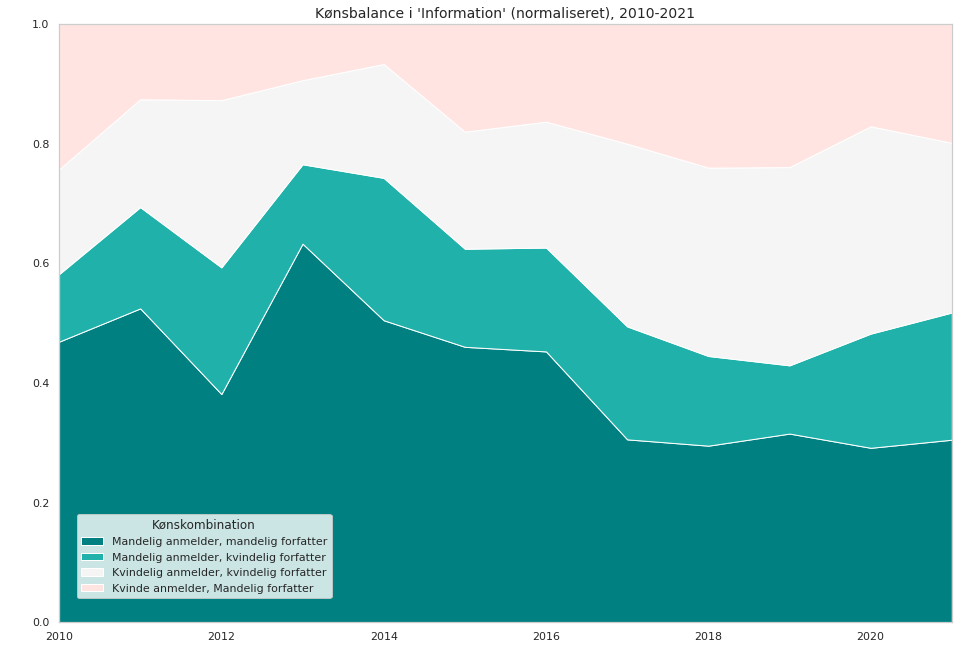

In [120]:
grouped_inf = df_inf.groupby(['year','gender_combi']).size().unstack()
normalized_inf = grouped_inf.div(grouped_inf.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvinde anmelder, mandlig forfatter']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_inf[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i 'Information' (normaliseret), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})

